# **My First ML Project**

# **Load data**

In [216]:

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [217]:
dtype_dict = {
    'Requestid': int,
    'StatusCode': int,
    'ip': str,  # Read IP initially as a string
    'url': str,
    'type': str,
    'timestamp': str,
    'tableid': int,
    'fromcache': bool,
    'method': str,
    'target': str  
}

In [218]:
df = pd.read_csv(r'C:\Users\acer\Desktop\CYBER HYGIENE TOOL V8 Superuser\KavachLocalAI\urls.csv')
df

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method,target
0,1,404,192.168.1.1,https://example.com/page-not-found,html,1702391637000,1419931203,False,GET,good
1,2,200,192.168.1.2,https://example.com/home,html,1702391638000,1419931203,True,GET,good
2,3,302,192.168.1.3,https://example.com/redirected,html,1702391639000,1419931203,False,GET,good
3,4,200,192.168.1.4,https://example.com/image.jpg,image,1702391640000,1419931204,True,GET,good
4,5,200,192.168.1.5,https://example.com/style.css,css,1702391641000,1419931204,True,GET,good
5,6,500,192.168.1.6,https://example.com/server-error,html,1702391642000,1419931204,False,GET,malicious
6,7,200,192.168.1.7,https://example.com/success,html,1702391643000,1419931205,True,POST,good
7,8,403,192.168.1.8,https://example.com/forbidden,html,1702391644000,1419931205,False,GET,malicious
8,9,200,192.168.1.9,https://example.com/data.json,json,1702391645000,1419931205,True,GET,good
9,10,200,192.168.1.10,https://example.com/contact,html,1702391646000,1419931206,True,GET,good


In [219]:
label_encoder = LabelEncoder()

print(df)


    Requestid  StatusCode            ip  \
0           1         404   192.168.1.1   
1           2         200   192.168.1.2   
2           3         302   192.168.1.3   
3           4         200   192.168.1.4   
4           5         200   192.168.1.5   
5           6         500   192.168.1.6   
6           7         200   192.168.1.7   
7           8         403   192.168.1.8   
8           9         200   192.168.1.9   
9          10         200  192.168.1.10   
10         11         200  192.168.1.11   
11         12         301  192.168.1.12   
12         13         200  192.168.1.13   
13         14         404  192.168.1.14   
14         15         200  192.168.1.15   
15         16         200  192.168.1.16   
16         17         200  192.168.1.17   
17         18         200  192.168.1.18   
18         19         200  192.168.1.19   
19         20         500  192.168.1.20   
20         21         200  192.168.1.21   
21         22         403  192.168.1.22   
22         

# **Data preparation**

## Data separation as X and y

In [220]:
y = df['target']
y

0          good
1          good
2          good
3          good
4          good
5     malicious
6          good
7     malicious
8          good
9          good
10         good
11         good
12         good
13         good
14         good
15         good
16         good
17         good
18         good
19    malicious
20         good
21    malicious
22         good
23         good
24         good
25         good
26         good
27         good
28         good
29         good
30         good
31         good
32         good
33         good
34         good
35         good
36         good
37         good
38         good
39         good
40         good
41    malicious
42    malicious
43         good
44         good
45    malicious
46         good
47         good
48         good
49           g1
Name: target, dtype: object

In [222]:
X = df.drop('target', axis=1)
X

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method
0,1,404,192.168.1.1,https://example.com/page-not-found,html,1702391637000,1419931203,False,GET
1,2,200,192.168.1.2,https://example.com/home,html,1702391638000,1419931203,True,GET
2,3,302,192.168.1.3,https://example.com/redirected,html,1702391639000,1419931203,False,GET
3,4,200,192.168.1.4,https://example.com/image.jpg,image,1702391640000,1419931204,True,GET
4,5,200,192.168.1.5,https://example.com/style.css,css,1702391641000,1419931204,True,GET
5,6,500,192.168.1.6,https://example.com/server-error,html,1702391642000,1419931204,False,GET
6,7,200,192.168.1.7,https://example.com/success,html,1702391643000,1419931205,True,POST
7,8,403,192.168.1.8,https://example.com/forbidden,html,1702391644000,1419931205,False,GET
8,9,200,192.168.1.9,https://example.com/data.json,json,1702391645000,1419931205,True,GET
9,10,200,192.168.1.10,https://example.com/contact,html,1702391646000,1419931206,True,GET


## Data splitting

In [223]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [224]:
X_train

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method
0,1,404,192.168.1.1,https://example.com/page-not-found,html,1702391637000,1419931203,False,GET
11,12,301,192.168.1.12,https://example.com/redirect,html,1702391648000,1419931206,False,GET
18,19,200,192.168.1.19,https://example.com/article,html,1702391655000,1419931209,True,GET
45,46,200,192.168.1.46,https://example.com/alert,html,1702391682000,1419931218,True,GET
38,39,200,192.168.1.39,https://example.com/order,html,1702391675000,1419931215,True,GET
25,26,404,192.168.1.26,https://example.com/missing,html,1702391662000,1419931211,False,GET
26,27,200,192.168.1.27,https://example.com/information,html,1702391663000,1419931211,True,GET
35,36,200,192.168.1.36,https://example.com/checkout,html,1702391672000,1419931214,True,GET
17,18,200,192.168.1.18,https://example.com/blog,html,1702391654000,1419931208,True,GET
7,8,403,192.168.1.8,https://example.com/forbidden,html,1702391644000,1419931205,False,GET


In [226]:
X_test

,Requestid,StatusCode,ip,url,type,timestamp,tableid,fromcache,method
6,7,200,192.168.1.7,https://example.com/success,html,1702391643000,1419931205,True,POST
36,37,200,192.168.1.37,https://example.com/payment,html,1702391673000,1419931215,True,GET
37,38,200,192.168.1.38,https://example.com/shipping,html,1702391674000,1419931215,True,GET
28,29,200,192.168.1.29,https://example.com/signup,html,1702391665000,1419931212,True,GET
43,44,200,192.168.1.44,https://example.com/announcement,html,1702391680000,1419931217,True,GET
49,50,200,192.168.1.50,https://example.com/download,html,1702391686000,1419931219,True,GET
5,6,500,192.168.1.6,https://example.com/server-error,html,1702391642000,1419931204,False,GET
33,34,200,192.168.1.34,https://example.com/account,html,1702391670000,1419931214,True,GET
20,21,200,192.168.1.21,https://example.com/terms,html,1702391657000,1419931209,True,GET
42,43,200,192.168.1.43,https://example.com/warning,html,1702391679000,1419931217,True,GET


In [227]:
# Encoding categorical variables
encoder = LabelEncoder()
df['ip'] = encoder.fit_transform(df['ip'])
df['url'] = encoder.fit_transform(df['url'])
df['type'] = encoder.fit_transform(df['type'])
df['method'] = encoder.fit_transform(df['method'])
df['target'] = encoder.fit_transform(df['target'])

# Clean the dataset, replacing 'undefined' with NaN and dropping NaN values
df_clean = df.replace('undefined', pd.NA).dropna().reset_index(drop=True)



# **Model Building**

## **Linear Regression**

### **Training the model**

In [259]:
encoder = LabelEncoder()
df['ip'] = encoder.fit_transform(df['ip'])
df['type'] = encoder.fit_transform(df['type'])
df['method'] = encoder.fit_transform(df['method'])
df['target'] = encoder.fit_transform(df['target'])  # Encoding the target for regression

# Splitting the data into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the LinearRegression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [260]:
# Evaluating the model
accuracy = linear_reg.score(X_test, y_test)
print(f"Accuracy of the Linear Regression model: {accuracy}")

Accuracy of the Linear Regression model: 0.04574642787634653


In [261]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### **Applying the model to make a prediction**

In [262]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [263]:
y_lr_train_pred

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.65661287e-10, 1.00000000e+00, 2.00000000e+00,
       2.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [264]:
y_lr_test_pred

array([1.55860313, 1.07104684, 1.02875534, 1.09738579, 0.96612144,
       1.11055526, 1.00841295, 1.6140641 , 1.03753497, 1.95249497])

### **Evaluate model performance**

In [265]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [266]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1.3552527156068805e-19
LR R2 (Train):  1.0
LR MSE (Test):  0.15268057153978457
LR R2 (Test):  0.04574642787634653


In [267]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [268]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,0.152681,0.045746


## **Random Forest**

### **Training the model**

In [269]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### **Applying the model to make a prediction**

In [270]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [271]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [272]:
rf_results = pd.DataFrame(['Random forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random forest,0.038569,0.724507,0.163578,-0.022364


## **Model comparison**

In [273]:
df_models = pd.concat([lr_results, rf_results], axis=0)

In [274]:
df_models.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.0,1.0,0.152681,0.045746
1,Random forest,0.038569,0.724507,0.163578,-0.022364


# **Data visualization of prediction results**

Text(0.5, 0, 'Experimental target')

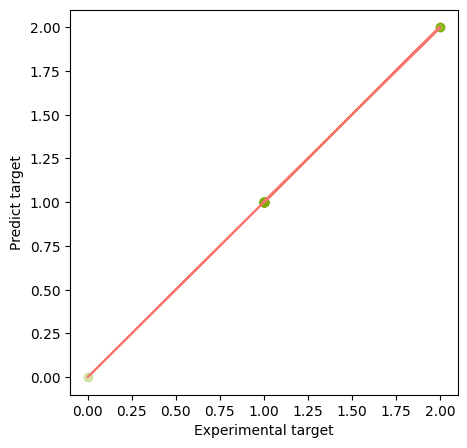

In [275]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict target')
plt.xlabel('Experimental target')